# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
url="http://api.openweathermap.org/data/2.5/weather?"
query_url = url+ "appid=" + weather_api_key+"&q="

# response=requests.get(query_url)
# response.json()


In [4]:

city_name=[]
lat=[]
lon=[]
max_temp=[]
humidity=[]
clouds=[]
wind_speed=[]
country=[]
date=[]
counter=1
#Tutor said not to use counter method but I can't get it to work any other way.

In [62]:
# response=requests.get(url+ "appid=" + weather_api_key+"&q="+cities[0]).json()

# response


In [63]:
# if (response['cod'] != '404'):
#     max_temp.append(response["main"]["temp_max"])
#     humidity.append(response["main"]["humidity"])
#     clouds.append(response["clouds"]["all"])
#     wind_speed.append(response["wind"]["speed"])
#     country.append(response['sys']["country"])
#     date.append(response['dt'])


# print(max_temp)
# print(humidity)
# print(clouds)
# print(wind_speed)
# print(country)
# print(date)

In [6]:
#change if/else to try/except?
#CAN'T GET TIME.SLEEP TO WORK.
#&units=imperial
#using i isn't working, try city/cities.

for city in cities:

    try:
        response=requests.get(query_url + city + "&units=imperial").json()
        city_name.append(response["name"])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response['sys']["country"])
        date.append(response['dt'])
        print(f"Returned City {counter}: {response['name']}.")
        counter += 1
    except:
        print('city not found...')
print(f'Execution Complete.  Have a nice day.')

Returned City 1: East London.
Returned City 2: Punta Arenas.
Returned City 3: Hobart.
Returned City 4: Esperance.
Returned City 5: Dunedin.
Returned City 6: Mar del Plata.
Returned City 7: Āsosa.
Returned City 8: Gram.
Returned City 9: Dalbandin.
Returned City 10: Honiara.
Returned City 11: Payakumbuh.
Returned City 12: Rikitea.
Returned City 13: George Town.
Returned City 14: Kapaa.
Returned City 15: Peniche.
Returned City 16: Ponta do Sol.
Returned City 17: Gravelbourg.
Returned City 18: Darhan.
Returned City 19: Hermanus.
Returned City 20: Nemuro.
city not found...
Returned City 21: Arraial do Cabo.
Returned City 22: Hong Kong.
Returned City 23: Qaanaaq.
Returned City 24: Tautira.
Returned City 25: Puerto Ayora.
Returned City 26: Avarua.
Returned City 27: Ushuaia.
Returned City 28: Ayr.
Returned City 29: Tasiilaq.
Returned City 30: Juneau.
Returned City 31: Port Elizabeth.
Returned City 32: Kahului.
Returned City 33: Hilo.
Returned City 34: Busselton.
Returned City 35: Urla.
Returne

In [8]:

dictionary = {
    'City':city_name, 
    'Lat': lat,
    'Lng': lon, 
    'Max Temp':max_temp, 
    'Humidity':humidity, 
    'Cloudiness':clouds,
    'Wind Speed':wind_speed, 
    'Country':country, 
    'Date':date
    }


In [13]:
weather_df=pd.DataFrame(dictionary)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,72.54,73,0,9.22,ZA,1645462562
1,Punta Arenas,-53.1500,-70.9167,62.71,45,0,17.27,CL,1645462427
2,Hobart,-42.8794,147.3294,49.86,72,75,5.75,AU,1645462562
3,Esperance,-33.8667,121.9000,62.44,70,0,15.82,AU,1645462562
4,Dunedin,-45.8742,170.5036,58.80,81,1,1.01,NZ,1645462563


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#were we supposed to use output file?  I will make a new csv just in case we are not supposed to overwrite output_file

weather_df.to_csv("weather_data.csv")
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,72.54,73,0,9.22,ZA,1645462562
1,Punta Arenas,-53.1500,-70.9167,62.71,45,0,17.27,CL,1645462427
2,Hobart,-42.8794,147.3294,49.86,72,75,5.75,AU,1645462562
3,Esperance,-33.8667,121.9000,62.44,70,0,15.82,AU,1645462562
4,Dunedin,-45.8742,170.5036,58.80,81,1,1.01,NZ,1645462563
...,...,...,...,...,...,...,...,...,...
533,Umm Kaddadah,13.6017,26.6876,70.47,13,22,11.92,SD,1645462733
534,Gamba,-2.6500,10.0000,81.00,77,100,5.79,GA,1645462733
535,Sulangan,11.1373,123.7228,78.89,83,99,13.96,PH,1645462734
536,Xining,36.6167,101.7667,18.77,50,96,3.11,CN,1645462734


In [15]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02
mean,20.077852,22.970670,53.189814,70.609665,59.488848,8.925353,1.645463e+09
std,32.881407,89.785394,32.497483,22.266878,37.275022,6.598055,8.637458e+01
min,-54.800000,-175.200000,-51.070000,5.000000,0.000000,0.000000,1.645462e+09
25%,-6.886425,-54.194150,35.455000,58.000000,21.000000,4.070000,1.645463e+09
50%,24.083350,25.461200,62.385000,75.000000,68.500000,7.460000,1.645463e+09
75%,46.664600,103.276025,78.750000,88.000000,100.000000,11.905000,1.645463e+09
max,78.218600,179.316700,103.620000,100.000000,100.000000,50.640000,1.645463e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#no cities with humidity > 100

In [26]:
weather_df["Wind Speed"]=weather_df["Wind Speed"].astype(int)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

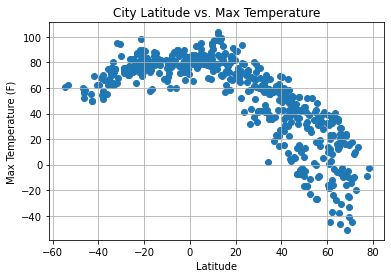

In [17]:
#pull out variables first
latitude=weather_df["Lat"]
temp=weather_df["Max Temp"]

plt.scatter(latitude, max_temp)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")

plt.savefig("Images/latitude_v_temp.png")
plt.show()

This plot seems to be showing us that as we move further north in latitudes, our maximum temperatures drop drastically; nearly a 100 degree drop from 20 degrees latitude to 70 degrees latitude.

## Latitude vs. Humidity Plot

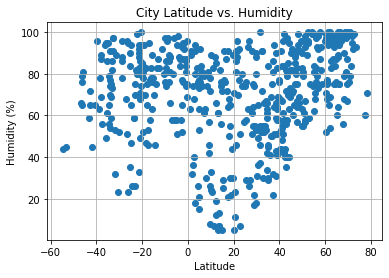

In [19]:
humidity=weather_df["Humidity"]

plt.scatter(latitude, humidity)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")

plt.savefig("Images/latitude_v_humidity.png")
plt.show()

Here we see a beautiful, slightly heart-shaped plot of humidity compared to latitude.  It would seem that the lowest humidity areas can be found between 0-20 degrees latitude, with a cluster of very high humidity areas between about 50-70 degrees latitude.

## Latitude vs. Cloudiness Plot

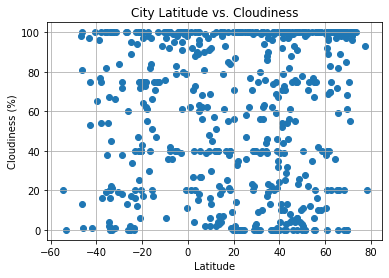

In [20]:
cloudiness=weather_df["Cloudiness"]

plt.scatter(latitude, cloudiness)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

plt.savefig('Images/latitude_v_clouds.png')
plt.show()

We can see plainly here that it's possible to find 100% cloudy days at any latitude, and there seems to be no correlation beetween cloudiness and latitude.

## Latitude vs. Wind Speed Plot

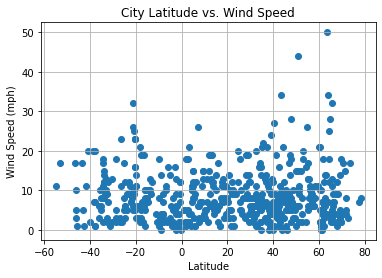

In [28]:
winds=weather_df["Wind Speed"]

plt.scatter(latitude, winds)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")

plt.savefig("Images/latitude_v_winds.png")
plt.show()

We can see patterns in wind speed from this graph, for example that wind speeds topping 20mph seem to be outliers in that they do not occur as often.  There does seem to be a higher likelihood that higher wind speeds would occur in latitudes north of the equator, however there is not enough of a correlation in this dataset to say that definitively.

## Linear Regression

In [30]:
#split data into north and south hemisphere

north_hem_df=weather_df.loc[weather_df["Lat"]>0]
south_hem_df=weather_df.loc[weather_df["Lat"]<=0]

#need temperatures, latitudes, humidity, clouds, and wind speed for each

north_temp=north_hem_df["Max Temp"]
north_lat=north_hem_df["Lat"]
north_hum=north_hem_df["Humidity"]
north_cloud=north_hem_df["Cloudiness"]
north_wind=north_hem_df["Wind Speed"]

south_temp=south_hem_df["Max Temp"]
south_lat=south_hem_df["Lat"]
south_hum=south_hem_df["Humidity"]
south_cloud=south_hem_df["Cloudiness"]
south_wind=south_hem_df["Wind Speed"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [51]:
(slope, intercept, rvalue, pvalue, stderr)=linregress(north_lat, north_temp)

regress=north_lat *slope+intercept
line="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

r-value: -0.8440284245850067


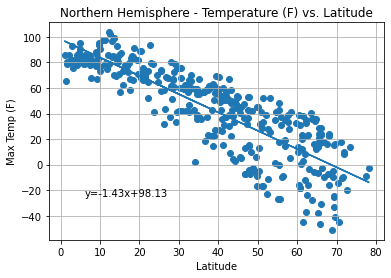

In [52]:
print(f"r-value: {rvalue}")
plt.scatter(north_lat, north_temp)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")

plt.plot(north_lat, regress)
plt.annotate(line, (6,-25))

plt.savefig("Images/northlatitude_v_temp.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: 0.5517314337837314


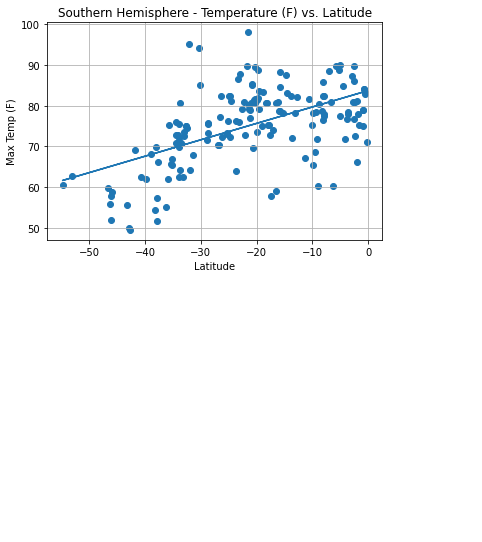

In [48]:
#same method, change to southern variables
(slope, intercept, rvalue, pvalue, stderr)=linregress(south_lat, south_temp)

regress=south_lat *slope+intercept
line="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

print(f"r-value: {rvalue}")
plt.scatter(south_lat, south_temp)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")

plt.plot(south_lat, regress)
plt.annotate(line, (-50,85))

plt.savefig("Images/southlatitude_v_temp.png")

plt.show()

In northern latitudes, there is a more definite correlation between temperature and latitude.  The further north you go from the equator, the lower the average temperature.  While this is also loosely true for the southern hemisphere, there is less of a definite correlation.  Temperatures do drop as you move further south from the equator, but there is a wider margin of degree variation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.44946845483713704


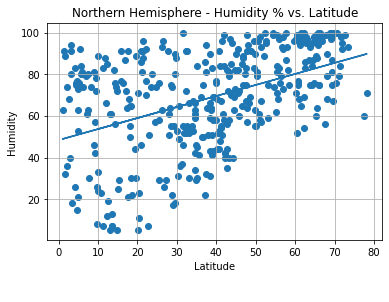

In [54]:
(slope, intercept, rvalue, pvalue, stderr)=linregress(north_lat, north_hum)

regress=north_lat *slope+intercept
line="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

print(f"r-value: {rvalue}")
plt.scatter(north_lat, north_hum)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity % vs. Latitude")

plt.plot(north_lat, regress)
plt.annotate(line, (60,25))

plt.savefig("Images/northlatitude_v_humidity.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.23027153309578316


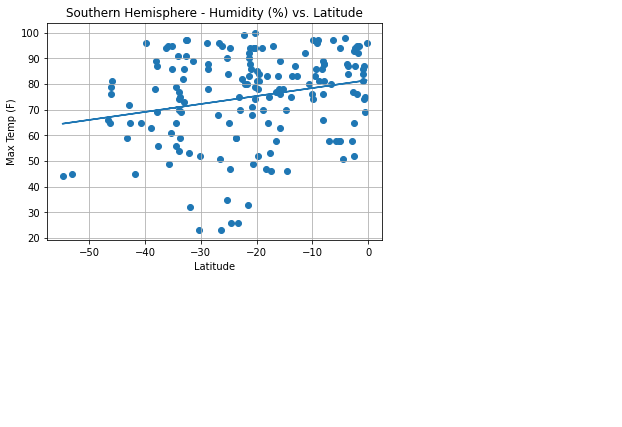

In [57]:
(slope, intercept, rvalue, pvalue, stderr)=linregress(south_lat, south_hum)

regress=south_lat *slope+intercept
line="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

print(f"r-value: {rvalue}")
plt.scatter(south_lat, south_hum)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")

plt.plot(south_lat, regress)
plt.annotate(line, (30,-50))

plt.savefig("Images/southlatitude_v_humidity.png")

plt.show()

There seems to be a definite spike in humidity in the northern latitudes of 50-80 degrees.  However, from there, as you move further south and past the equator, there seems to be wide variability in humidity levels with little discernable patterns.  It seems tempting to observe more plots in the northern hemisphere and gather that the southern hemisphere has lower humidity due to visibly fewer plots, but there are also fewer cities in the southern latitudes and this must be considered as a possible reason.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.1776528546914963


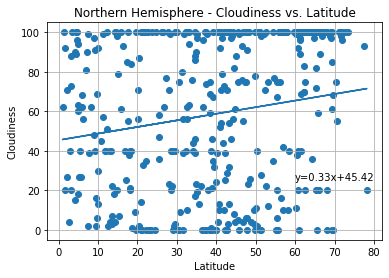

In [59]:
(slope, intercept, rvalue, pvalue, stderr)=linregress(north_lat, north_cloud)

regress=north_lat *slope+intercept
line="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

print(f"r-value: {rvalue}")
plt.scatter(north_lat, north_cloud)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")

plt.plot(north_lat, regress)
plt.annotate(line, (60,25))

plt.savefig("Images/northlatitude_v_cloudiness.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.32212494646915096


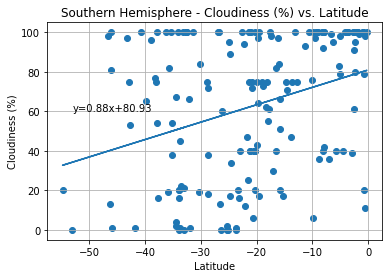

In [65]:
(slope, intercept, rvalue, pvalue, stderr)=linregress(south_lat, south_cloud)

regress=south_lat *slope+intercept
line="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

print(f"r-value: {rvalue}")
plt.scatter(south_lat, south_cloud)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")

plt.plot(south_lat, regress)
plt.annotate(line, (-53,60))

plt.savefig("Images/southlatitude_v_cloudiness.png")

plt.show()

Once again, it seems that there is little correlation between latitudes and cloudiness percentage.  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: 0.04697784262618388


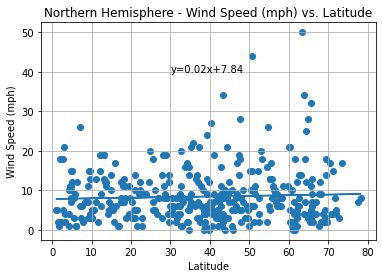

In [67]:
(slope, intercept, rvalue, pvalue, stderr)=linregress(north_lat, north_wind)

regress=north_lat *slope+intercept
line="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

print(f"r-value: {rvalue}")
plt.scatter(north_lat, north_wind)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")

plt.plot(north_lat, regress)
plt.annotate(line, (30,40))

plt.savefig("Images/northlatitude_v_windspeed.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: -0.18677113395236544


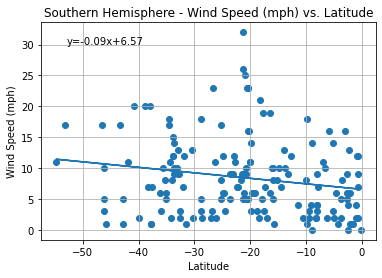

In [68]:
(slope, intercept, rvalue, pvalue, stderr)=linregress(south_lat, south_wind)

regress=south_lat *slope+intercept
line="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

print(f"r-value: {rvalue}")
plt.scatter(south_lat, south_wind)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")

plt.plot(south_lat, regress)
plt.annotate(line, (-53,30))

plt.savefig("Images/southlatitude_v_windspeed.png")

plt.show()

What is interesting here is that we can gather the same information as before about northern latitudes and wind speeds: that speeds tend to remain between 0-20mph, and wind speeds above that are more rare outliers; our southern hemisphere plots give us the same information, with the maximum outlier only being near 32mph compared to the northern hemisphere's 50mph outlier.